In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
import os

# Get current working directory
cwd = os.getcwd()

# Print current working directory
print("Current working directory:", cwd)

os.chdir('/Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project2')

# Get current working directory
cwd = os.getcwd()

# Print current working directory
print("Current working directory:", cwd)

Current working directory: /Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project2
Current working directory: /Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project2


In [3]:
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


USA dominance, visualized

In [8]:
nobel['us'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] =(nobel['year']//10)*10 

us = nobel.groupby('decade')['us'].mean().reset_index()
us
# us = nobel[nobel['birth_country'] == 'United States'].groupby('decade').agg({'full_name': 'count', 'us_born_winner': 'mean'}).reset_index()
# us.columns = ['decade', 'count', 'us']

,decade,us
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


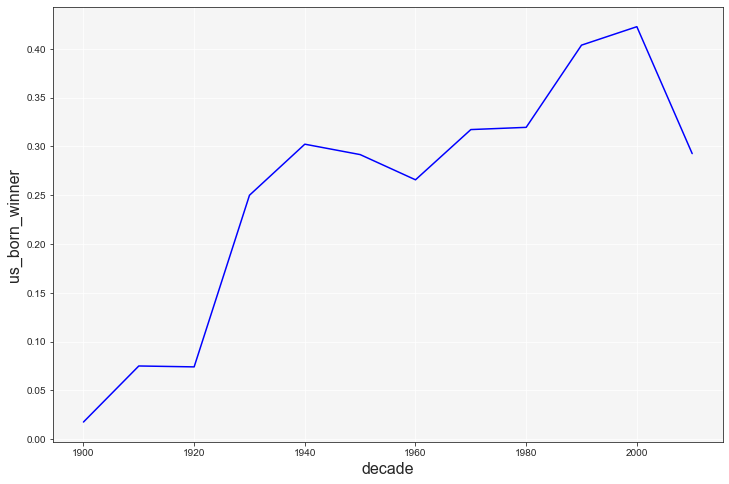

In [9]:
#plot
import seaborn as sns
# Set the plot style
sns.set_style("ticks", {"axes.facecolor": "#F5F5F5", "grid.color": "white", "grid.linestyle": "-", "grid.linewidth": 1.5})

plt.figure(figsize=(12,8))


ax = sns.lineplot(data=us, x='decade', y='us', color='blue')

#ax.fill_between(nobel['decade'], nobel['us']+0.01,nobel['us']-0.01, alpha=0.2, color='blue')

plt.xlabel('decade', fontsize=16)
plt.ylabel('us_born_winner',fontsize=16) 
mean_value = us['us'].mean()
# Add grid lines
plt.grid(True)


                  

What is the gender of a typical Nobel Prize winner?

In [10]:
nobel['female'] = nobel['sex'] == 'Female'
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,us,decade,female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [11]:

female_nobel = nobel.groupby(['decade','category'])['female'].mean().reset_index()
type(female_nobel)

pandas.core.frame.DataFrame

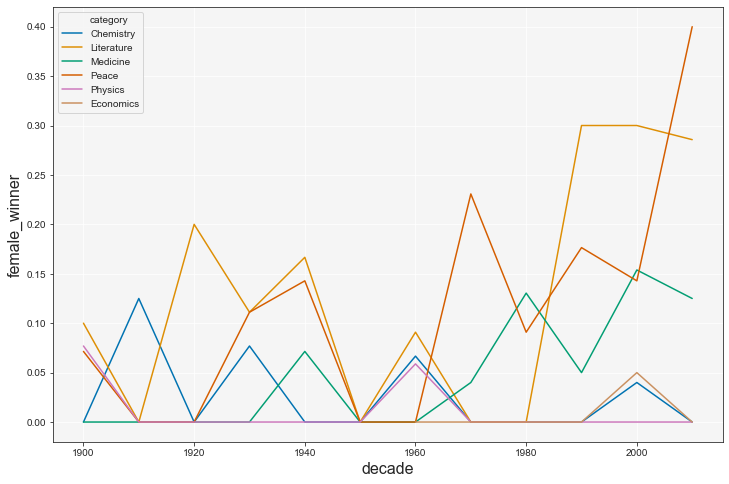

In [12]:

sns.set_style("ticks", {"axes.facecolor": "#F5F5F5", "grid.color": "white", "grid.linestyle": "-", "grid.linewidth": 1.5})

plt.figure(figsize=(12,8))
ax = sns.lineplot(data=female_nobel, x='decade', y='female', hue='category', palette='colorblind')
plt.xlabel('decade', fontsize=16)
plt.ylabel('female_winner',fontsize=16) 

# Add grid lines
plt.grid(True)


Repeat laureates: For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few?

In [13]:
#count the number of time a full name of scientists/writers/activists appear
appear = nobel.groupby('full_name').count().reset_index()
#check if the number of time he/she got the nobel is more than on, year is choose to check because it is distinct
repeat_laureats = appear[appear['year']>1]
print("Repeat Laureates:")
for i, name in enumerate(repeat_laureats.full_name):
    print(f"{i+1}. {name}")

Repeat Laureates:
1. Comité international de la Croix Rouge (International Committee of the Red Cross)
2. Frederick Sanger
3. John Bardeen
4. Linus Carl Pauling
5. Marie Curie, née Sklodowska
6. Office of the United Nations High Commissioner for Refugees (UNHCR)


How old are you when you get the prize?

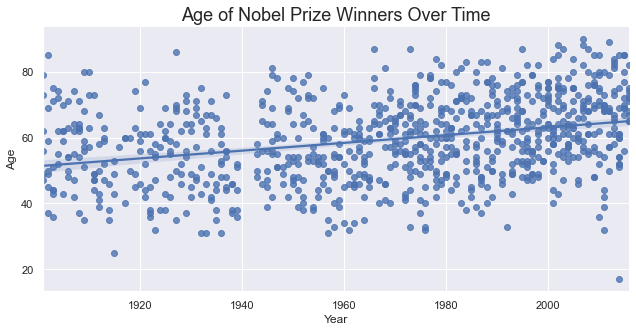

In [14]:

# Convert birth_date from string to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], format='%Y-%m-%d', errors='coerce')
# Get birth year to calculate age
nobel['birth_year'] = nobel['birth_date'].dt.year

# Calculate the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_year']

# Plot the age of Nobel Prize winners over time
sns.set(style="darkgrid")
sns.lmplot(x='year', y='age', data=nobel, height=4.5, aspect=2)

# Add axis labels and a title
sns.set(font_scale=1.5)
plt.xlabel("Year")
plt.ylabel("Age")
plt.title("Age of Nobel Prize Winners Over Time")

# Display the plot
plt.show()

Age differences between prize categories

IndexError: index 5 is out of bounds for axis 0 with size 5

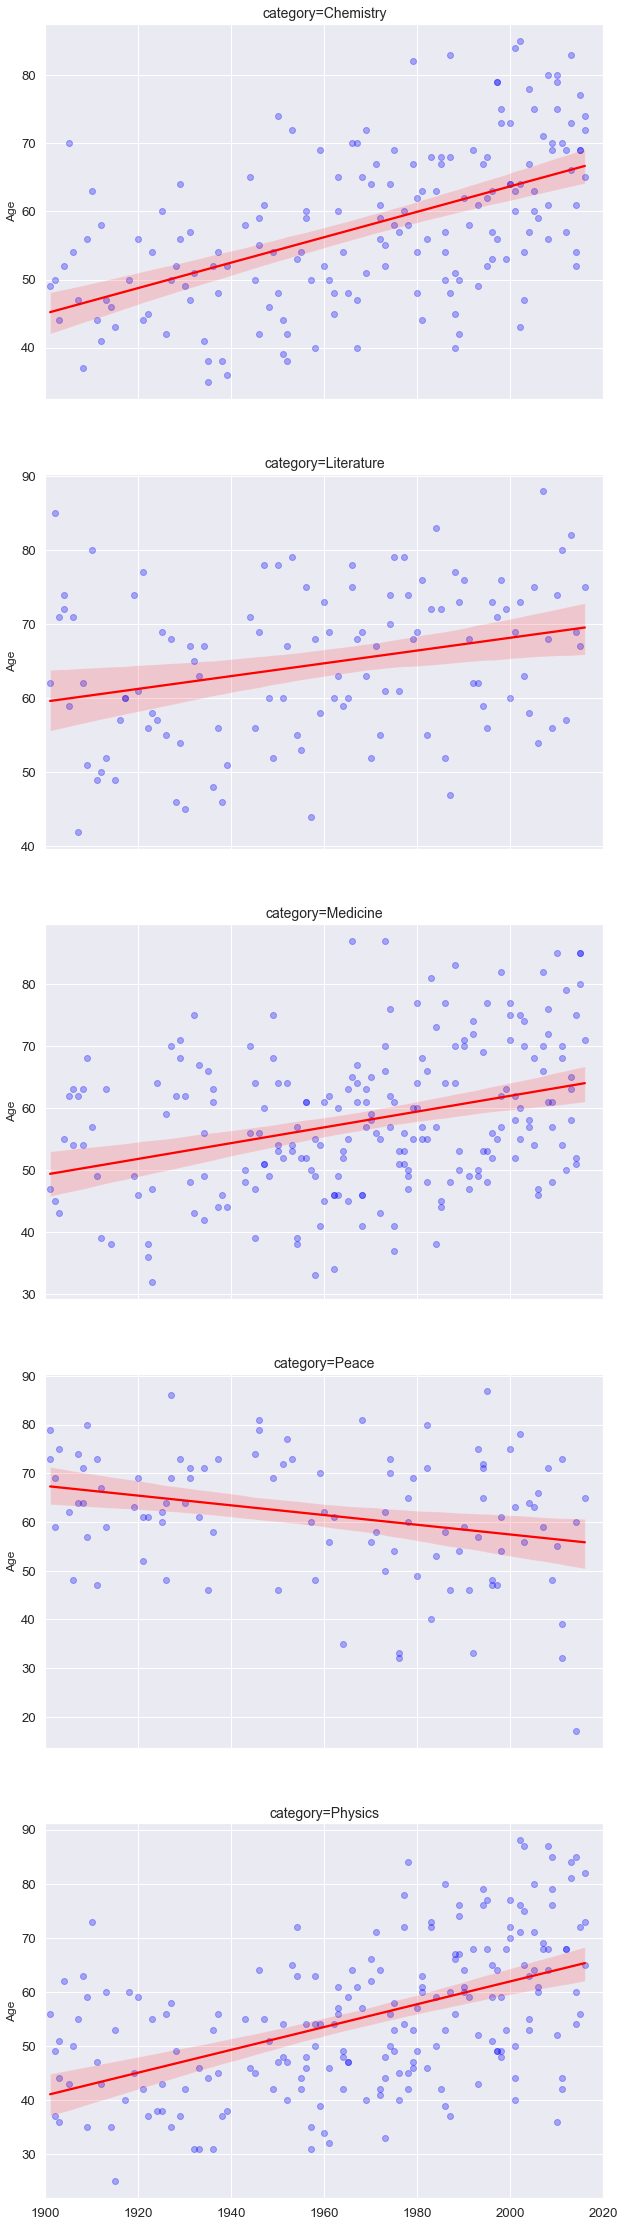

In [15]:
sns.set(style="darkgrid", font_scale=1.2)
fig, axes = plt.subplots(nrows=5, figsize=(10, 40), sharex=True)
categories = nobel['category'].unique()
for i, category in enumerate(categories):
    category_df = nobel[nobel['category'] == category]
    sns.regplot(x='year', y='age', data=category_df, ax=axes[i], scatter_kws={'color': 'blue', 'alpha': 0.3}, line_kws={'color': 'red'})
    axes[i].set_title('category='+category, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Age', fontsize=12)
    axes[i].set_xlim(1900, 2020)
plt.suptitle('Age of Nobel Prize Winners Over Time by Category', fontsize=18, y=0.95)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()